## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"][0] = 12
#plt.rcParams["figure.figsize"][1] = 8

In [3]:
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 6

In [4]:
## additional import

from sklearn.metrics import matthews_corrcoef
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
import gc
from tqdm import tqdm

/usr/bin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# import necessaries
#project into 3-dim with pca
from mpl_toolkits import mplot3d
#import matplotlib.pyplot as plt
from sklearn import decomposition

In [6]:
#data = pd.read_table("aps_failure_training_set.csv", header=None)
## customer
data = pd.read_csv("data.csv")
data.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9 ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33 ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244 ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85 ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87 ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21 ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

In [7]:
## encoding feature 0?
## value_count first
data.iloc[:, 0].value_counts()

X16.V1.50     1
X9.V1.554     1
X14.V1.38     1
X19.V1.471    1
X1.V1.910     1
X19.V1.363    1
X4.V1.853     1
X8.V1.972     1
X1.V1.804     1
X12.V1.514    1
X21.V1.115    1
X23.V1.264    1
X21.V1.94     1
X15.V1.47     1
X7.V1.65      1
X14.V1.316    1
X2.V1.31      1
X4.V1.79      1
X15.V1.90     1
X12.V1.764    1
X22.V1.612    1
X6.V1.391     1
X23.V1.13     1
X6.V1.993     1
X16.V1.612    1
X18.V1.414    1
X19.V1.484    1
X3.V1.53      1
X16.V1.54     1
X13.V1.37     1
             ..
X16.V1.34     1
X6.V1.904     1
X13.V1.22     1
X8.V1.304     1
X14.V1.301    1
X4.V1.473     1
X6.V1.17      1
X5.V1.332     1
X2.V1.284     1
X2.V1.213     1
X17.V1.192    1
X13.V1.972    1
X15.V1.213    1
X9.V1.254     1
X23.V1.27     1
X9.V1.88      1
X11.V1.154    1
X5.V1.133     1
X2.V1.421     1
X21.V1.452    1
X16.V1.521    1
X21.V1.521    1
X6.V1.43      1
X14.V1.373    1
X22.V1.54     1
X15.V1.644    1
X1.V1.63      1
X21.V1.482    1
X15.V1.20     1
X22.V1.46     1
Name: Unnamed: 0, Length

In [8]:
## only names
## drop 1 columns
dataTemp = data.drop(['Unnamed: 0'], axis=1)
dataTemp.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10 ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38 ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232 ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94 ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79 ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59 ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [9]:
## check missing
dataTemp.isnull().any().any()


False

In [10]:
DimT = len(dataTemp.columns)
print(DimT)

179


In [11]:
## now load y label since need to drop 0th row

#y_temp = pd.read_csv('secom_labels.data.txt', sep=' ', header=None)
y_temp = dataTemp.iloc[:, DimT-1]


#y_temp = y_temp.drop([0,1])
y_temp.head()

0    4
1    1
2    5
3    5
4    5
Name: y, dtype: int64

y_label = y_temp.iloc[:, 0]
y_label[ y_label == -1] = 0
y_label

In [12]:
y_temp.value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [13]:
## deal with label
## 1 against rest first
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp == 1] = 1

# y_label ready

In [14]:
## drop label
dataTemp2 = dataTemp.drop(['y'], axis=1)
dataTemp2.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...   X169  X170  X171  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...      8   -17   -15   
1  386  382  356  331  320  315  307  272  244  232  ...    168   164   150   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...     29    57    64   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...    -80   -82   -81   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     10     4     2   

   X172  X173  X174  X175  X176  X177  X178  
0   -31   -77  -103  -127  -116   -83   -51  
1   146   152   157   156   154   143   129  
2    48    19   -12   -30   -35   -35   -36  
3   -80   -77   -85   -77   -72   -69   -65  
4   -12   -32   -41   -65   -83   -89   -73  

[5 rows x 178 columns]

In [15]:
dataTemp2.describe()

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

           ...               X169          X170          X171          X172  \
count      ...       11500.000000  11500.000000  11500.000000  11500.000000   
mean       ...          -9.498870    -10.145739    -11.630348    -12.943478   
std        ...         165.235574    164.652883    166.149790    168.554058   
min        ...       -1860.000000  -1867.000000  -1865.000000  -1642.000000   
25%        ...         -55.000000    -55.000000    -56.000000    -56.000000   
50%        ...          -8.000000     -9.000000    -10.000000    -10.000000   
75%        ...          35.000000     34.000000     34.000000     33.000000   
max        ...        2047.000000   1777.000000   1472.000000   1319.000000   

               X173          X174          X175          X176          X177  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -13.668870    -13.363304    -13.045043    -12.705130    -12.426000   
std      168.556486    167.257290    164.241019    162.895832    162.886311   
min    -1723.000000  -1866.000000  -1863.000000  -1781.000000  -1727.000000   
25%      -56.000000    -55.000000    -56.000000    -55.000000    -55.000000   
50%      -10.000000    -10.000000     -9.000000     -9.000000     -9.000000   
75%       33.000000     34.000000     34.000000     34.000000     34.000000   
max     1436.000000   1733.000000   1958.000000   2047.000000   2047.000000   

               X178  
count  11500.000000  
mean     -12.195652  
std      164.852015  
min    -1829.000000  
25%      -55.000000  
50%       -9.000000  
75%       34.000000  
max     1915.000000  

[8 rows x 178 columns]

In [16]:
## drop std == 0 
STD_DES = dataTemp2.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [ ]:
## random sample data since too large
## from train test split?



In [ ]:
## for Epileptic 
## 1 against rest
## 1 against another(2,3,4,5)(latter)


In [ ]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [ ]:
## see whole first


In [17]:
## optional
pStr = 'Epileptic'

In [18]:
colors = ['rgb(55,126,184)','rgb(228,26,28)','rgb(77,175,74)']

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title=pStr,
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        #aspectmode = 'manual'        
    ),
)


In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [20]:
## define function
## plot both data and label
## using plotly for interactive

# x should be dataframe, y should be series or np array
# X: original, Xpr: projected

# no need title
def plotly_PCAproj_xy(X, y_label, 
                      colors, layout, 
                      n_comp = 3):

    Xtemp = X.values.copy()
    
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(Xtemp)
    # maybe can put separately
    Xpr = pca.transform(Xtemp)

    # for safety, using numpy tool after transform
    #y_temp = y.values.copy()
    
    #Xpr_n = Xpr[np.where(y_temp == 0)[0]]
    #Xpr_a = Xpr[np.where(y_temp == 1)[0]]
    
    ## running
    data = []
    pointName = ['normal','anomaly']

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp = X.loc[y_label == i]
        temp_now = pca.transform(temp)

        name = names
        color = colors[i]
        x = temp_now[:,0]
        y = temp_now[:,1]
        z = temp_now[:,2]

        trace = dict(
                name = pointName[i],
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        data.append(trace)
    len(data)    
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)
    
    
# 3-D plot
# X as dataFrame
# maybe no title first
def plotly_3D_xy(X, y_label, 
                 colors, layout):

    data = []
    pointName = ['normal','anomaly']

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp_now = X.loc[y_label == i].copy()
        print(i, len(temp_now), len(X))

        name = pointName[i]
        color = colors[i]
        x = temp_now.iloc[:,0].values.copy()
        y = temp_now.iloc[:,1].values.copy()
        z = temp_now.iloc[:,2].values.copy()

        trace = dict(
                name = name,
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        
        data.append(trace)  
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)

    
## 2-D plot
# X as dataFrame
## for 2D, original plt is enough
def plot2D_xy(X, y):
    # normal
    Xpr_n = X.loc[y == 0].values.copy()
    # anomaly
    Xpr_a = X.loc[y == 1].values.copy()
    
    ax = plt.axes()

    
    plt.plot(Xpr_n[:,0], Xpr_n[:,1], 'co')
    plt.plot(Xpr_a[:,0], Xpr_a[:,1], 'ro')
    
    
    #plt.plot(Xpr[:,0], Xpr[:,1])
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()


## get y_label
## may need transform to 0 1
# manuelly

dataX = dataTemp2.drop([1558], axis = 1)


y_temp = dataTemp2.iloc[:, 1558]
y_label = np.zeros(len(y_temp))
y_label[ y_temp == pStr ] = 1
## y ready

In [21]:
# make sure that data exclude y_label
dataX = dataTemp2
y_current = y_label
#y_label = y_temp
# y_label ready

In [ ]:
## random sample
selectIdx = np.random.choice(60000, 10000, replace=False)
selectIdx

In [ ]:
dataX = dataTemp4.iloc[selectIdx]
y_current = y_label[selectIdx]

In [22]:
## plot whole
names = 'Epileptic whole'
plotly_PCAproj_xy(dataX, y_current, 
                  colors, layout, 
                  n_comp=3)

In [23]:
def showLaplacian(currentData, pickN=100):
    tempW = currentData.corr().values
    weight_abs = abs(tempW)
    #w_abs
    plt.imshow(weight_abs)
    #show scale of colors
    plt.colorbar()
    plt.show()
    
    ## for correlation matrix, take normal only at first
    # plot out eigen gap first

    from scipy.sparse import csgraph

    ## note: from github, normalized Laplacian is symmetric

    Lsym = csgraph.laplacian(weight_abs, normed = True)

    # eigen decomposition
    from numpy import linalg as LA
    w, v = LA.eig(Lsym)
    sortW = np.sort(w) # no need order here

    ## plot out
    ## adjust plot parameter

    tempX = np.arange(len(sortW))+1

    plt.scatter(tempX, sortW)
    plt.plot(tempX, sortW)
    plt.show()
    
    
    ## plot eigen difference

    diffSortW = np.diff(sortW)

    tempX = np.arange(len(diffSortW))+1

    # bar plot
    plt.bar(tempX, diffSortW)
    plt.show()
    
    ## show top candidates of k choices
    ## see eigen gap, find from big to small
    ## just print out at first
    ## for i in diffSortW, means eigen i+1 - i
    ## but python start from 0, so add 1 
    rank0 = np.argsort(-diffSortW)
    rank = rank0[0:pickN]+1
    
    #print(rank0[0:pickN])
    print(rank)
    
    

    return weight_abs, diffSortW, rank

In [24]:
## take away y_label
currentData = dataX

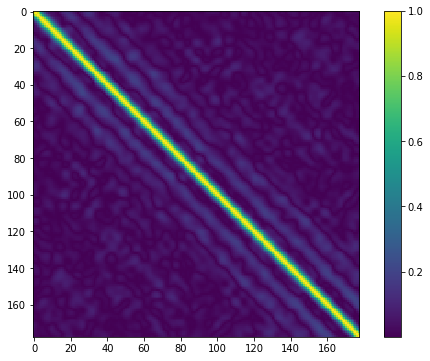

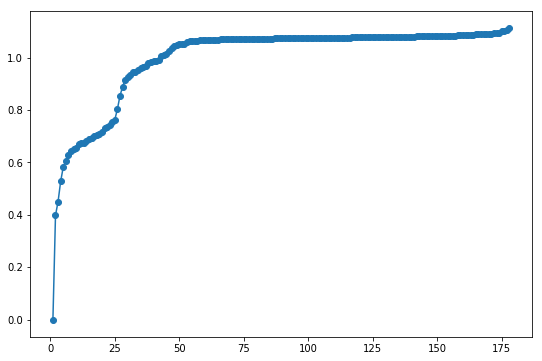

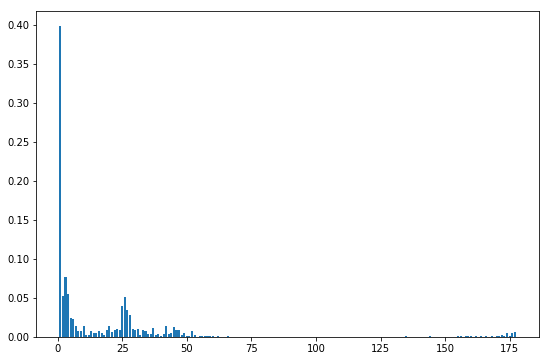

[  1   3   4   2  26  25  27  28   5   6  20   7  10  42  45  37  23  29
  31  46  24  33  47  30  22  19  16  34   9  52  13   8 177  21  49 176
  14  17 174  15  44  39  36  43  35  41  12  48 172  38  32  11  53  18
  40  57 164  56 160  51 173 162 170  50 158 166  55  58 155  62  59 156
  66 171 175 135  60 159 168 144  64 128 169 146  84 123 151  89 152 149
 139  77  80 105 167 120 153  74  78 147]


In [25]:
sPack = showLaplacian(currentData)
weight_abs = sPack[0]
diffSortW = sPack[1]
rank = sPack[2]

In [26]:
k = rank[1]
print(k)

3


In [27]:
from sklearn.cluster import spectral_clustering

# might have no choice to choose k = 2
labels = spectral_clustering(weight_abs, 
                             n_clusters=k, eigen_solver='arpack')

## get cluster index once and for all
feaNumArr = [None]*k
for clusKey in range(0, k):
    featureNum = np.where(labels == clusKey)[0]
    feaNumArr[clusKey] = featureNum
print(feaNumArr)

[array([ 43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]), array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])]


In [28]:
import matplotlib.patches as patches

In [29]:
def reArrangeW(labels, currentData):
    ## show correlation matrix with rearrangement

    arrange = np.zeros(len(labels))
    idxH = 0
    # rearrenge
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]

        idxE = idxH + len(featureNum)

        # become float type
        arrange[idxH:idxE] = featureNum

        #updata index
        idxH = idxE

        #print(arrange)

    # transform back to integer
    arrange = arrange.astype(int)
    
    # indexing with iloc
    reArrData = currentData.iloc[:, arrange]
    tempW = reArrData.corr().values
    weight_abs = abs(tempW)
    
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    
    
    #w_abs
    ax.imshow(weight_abs)
    #show scale of colors
    #plt.colorbar()
    
    
    ## add blocks here
    # Create a Rectangle patch
    ## adjust 0.5, by Yang (ˊ● ω ●ˋ)
    sPoint = np.zeros(2)-0.5
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]
        width = len(featureNum)
        
        rect = patches.Rectangle(sPoint, width, width,linewidth=1,edgecolor='white',facecolor='none')
        ax.add_patch(rect)

        
        sPoint = sPoint + width
    plt.show()

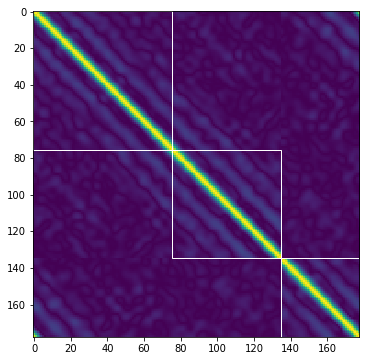

In [30]:
reArrangeW(labels, currentData)

In [ ]:
## import here


## fix printout problem, refine rate_limit
## ref: https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-when-viewing-image-in-jupyter-notebook
## ref: 

In [ ]:
## prepare list for plotly first
## deal with data inside function
## only plot one each time QQ

## see if need to control n rows

tempY = y_label
tempY

In [31]:
## if random selected, in order to prevent out of memory
currentData = dataX
tempY = y_current

for clusKey in range(0, 10):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

In [ ]:
currentData.describe()

for clusKey in range(0, k):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

tempY = y_train['Response']

In [ ]:
## do manuelly
## copy cluster elements

featureNum = np.array([22, 23, 25, 26, 27])

In [ ]:
## cluster 10(?): 22 23 25 26 27

In [ ]:
str(featureNum)

In [ ]:
names = 'Epileptic whole'

In [32]:
clusKey = 0
#X = X_train.iloc[:, featureNum]
featureNum = feaNumArr[clusKey]

X = currentData.iloc[:, featureNum]
#tempY = y_label[idxT]
    
#print("Cluster ", clusKey)
print(featureNum)
if len(featureNum) > 3:
    print("PCA into 3 dim")
    plotly_PCAproj_xy(X, tempY, colors, layout)
elif len(featureNum) == 3:
    print("3D plot")
    plotly_3D_xy(X, tempY, colors, layout)
elif len(featureNum) == 2:
    plot2D_xy(X, tempY)
else:
    print("In ", clusKey, ", only 1 dimension")

[ 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118]
PCA into 3 dim


## try detecting

In [33]:
def Track_w(x, w, d, beta):
    y = x.dot(w)
    d = beta*d + y*y
    e = x- y*w
    wNew = w + (y/d)*e
    return wNew, d

#becareful shape of sim_pool


def OD_onlinePCA_m(A, beta):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in range(0, n):
        u ,d = Track_w(A[i,:]-A_m, u, d, 1)
    #end
    u = u/np.linalg.norm(u)
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in range(0,n):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end

    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d

#becareful shape of sim_pool

#suspicious_index: turn order accending original index into rank array

def OD_onlinePCA_forget(A, beta, ini_For):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in range(0, n):
        u ,d = Track_w(A[i,:]-A_m, u, d, ini_For)
        #
        #print(u)
    #end
    u = u/np.linalg.norm(u)
    
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in range(0,n):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end
    
    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d



In [34]:
## cleaning by droping top t%, remain top as threshold, via OD_onlinePCA_m
# drop with whole data, and clusterd data(k results)
# show threshold

# construct function since need implements many times

def cleanPCA(A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(A, beta, ini_For)
    
    #
    u0 = u
    
    #drop top t data, suspicious_index descending order
    #print("A.shape[1] ", A.shape[1])
    dropN = int(A.shape[0]*drop_rate_t)
    
    cleanIdx = suspicious_index[dropN:len(suspicious_index)]
    cleanA = A[cleanIdx, :]
    
    #print(dropN, cleanA.shape[0])
    
    #just check
    #print(suspicious_score[suspicious_index])
    
    #print threshold, before deleting top datas
    # threshold = suspicious_score[cleanIdx[0]]
    
    #last from dropped
    threshold = suspicious_score[suspicious_index[dropN-1]]
    #print("Threshold: ", threshold)
    
    
    
    
    #get new u
    betaR = 1/(sRate*cleanA.shape[0])
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(cleanA, betaR, ini_For)
    
    cleanCos = abs(u.dot(u0))
    #print(cleanCos)
    # return pca from clean data, return threshold, new beta
    return u, d, threshold, betaR, cleanCos 

def detectScore(x, u, d, betaR):
    newU, newD = Track_w(x, u, d, betaR)
    
    newU = newU / np.linalg.norm(newU)
    score = 1 - abs(u.dot(newU))
    
    return score
    
    
#detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca(testA, u, d, betaR, threshold, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    
    #
    scoreTable = np.zeros(N)
    
    u0 = np.copy(u)
    d0 = np.copy(d)
    
    for i in range(0, N):
        x = testA[i, :]
        #scoring
        score = detectScore(x, u0, d0, betaR)
        
        # for auc
        scoreTable[i] = score
        
        #print(score)
        
        #check threshold
        if score >= threshold:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                newU, newD = Track_w(x, u0, d0, upFor)
                
                u0 = newU / np.linalg.norm(newU)
                d0 = newD
            
        
    #end for
    
    
    return result, scoreTable



In [35]:
## multiple cleaning

def cleanPCA_mul(feaNumArr, k, A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    
    uArr = [None]*k
    dArr = np.zeros(k)
    thresholdArr = np.zeros(k)
    cleanCosArr = np.zeros(k)
    # betaR should be the same for all clusters
    
    # A already an array
    
    for clusKey in range(0, k):
        featureNum = feaNumArr[clusKey]
        tempA = A[:, featureNum]
        u, d, threshold, betaR, cleanCos = cleanPCA(tempA, sRate, beta, ini_For, drop_rate_t)
        
        uArr[clusKey] = u
        dArr[clusKey] = d
        thresholdArr[clusKey] = threshold
        cleanCosArr[clusKey] = cleanCos
        
    #maybe return objects, only uArr faced problem
    return uArr, dArr, thresholdArr, betaR, cleanCosArr


## scoring strategies for multiple clusters

# input scoringTable, thresholdArray, strategy(categorial variable)
# output boolean, if alert or not


def judgeAlert(scoringArr, thresholdArr, strategy):
    anomaly = False
    
    MAX = 0
    AVG = 1
    ANY = 2
    
    if strategy == MAX:
        score = np.max(scoringArr)
        threshold = np.max(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == AVG:
        score = np.mean(scoringArr)
        threshold = np.mean(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == ANY:
        k = len(thresholdArr)
        #print("k: ", k)
        for i in range(0, k):
            if scoringArr[i] >= thresholdArr[i]:
                anomaly = True
                #print(i, scoringArr[i], thresholdArr[i])
        #end for i
    

    
    return anomaly

# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul(feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    scoringTable = np.zeros([N,k])
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in range(0, k):
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        scoringTable[i,:] = scoringArr
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr, thresholdArr, strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in range(0, k):
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result, scoringTable

## function for dropping bad cluster

def checkCluster(thresholdArr, BDD):
    fineClus = np.where(thresholdArr >= BDD)[0]
    
    return fineClus

# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul_select(fineClus, feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    scoringTable = np.zeros([N,k])
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in fineClus:
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        scoringTable[i,:] = scoringArr
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr[fineClus], thresholdArr[fineClus], strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in fineClus:
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result, scoringTable

## for output one score
def oneScore(scoringTable, strategy):
    MAX = 0
    AVG = 1
    
    if strategy == MAX:
        return np.amax(scoringTable, axis=1)
    elif strategy == AVG:
        return np.mean(scoringTable, axis=1)
    else:
        print('Wrong strategy')
        return np.zeros(1)

In [36]:
currentData = dataX
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [38]:
## need separate functions to run every feature

## for whole dataset
## for clustered dataset

## build basis experiment fucntion
## using previous reference names
## half normal, other normal and all anomaly
## finish in one block

## follow coding style
## return exp result
def oneRandomTrailWhole(X_nor, X_test, y_test,
                        sRateW, betaW, ini_For_W, dropRateT_W):
    '''
    One time random trail for whole data detection and clustered data detection
    
    Parameter
    ---------
    norNum : 
    
    currentWhole
    
    sRate : sampling rate, also for recompute beta after cleaning process
    
    beta : from sampling rate(sRate), for initial training
    
    ini_For : 
    
    dropRateT:
    
    
    
    Returns
    -------

    
    tprW
    
    fprW
    
 
    
    '''

    y_true = y_test

    ## whole
    A = X_nor.astype(float).values.copy()
    A.shape

    #sRate = 0.3
    #beta = 1/(sRate*len(X_nor))
    #dropRateT = 0.02

    ## add AUC
    ## put tqdm in pca
    A = X_nor.astype(float).values.copy()


    u, d, threshold, betaR_W, cleanCos = cleanPCA(A, sRateW, betaW, ini_For=ini_For_W, drop_rate_t=dropRateT_W)

    #print('--------------------')



    #get y_labels
    testA = X_test.astype(float).values.copy()

    # detecting
    ## UPDATE default True
    result, scoreTable = test_pca(testA, u, d, betaR_W, threshold)


    tn, fp, fn, tp = confusion_matrix(y_true, result).ravel()

    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    #tprW[trail] = tpr
    #fprW[trail] = fpr
    tprW = tpr
    fprW = fpr
    
    # ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
    #print('tpr: ', tpr, ', fpr: ', fpr)
    #pd.crosstab(y_true, result ,rownames=['True'], colnames=['Predicted'], margins=True)
    
    auc = roc_auc_score(y_true, scoreTable)
    
    return tprW, fprW, auc



## build basis experiment fucntion
## using previous reference names
## half normal, other normal and all anomaly
## finish in one block

## follow coding style
## return exp result
def oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresBDD, strategy):
    '''
    One time random trail for whole data detection and clustered data detection
    
    Parameter
    ---------
    norNum : 
    
    currentWhole
    
    sRate : sampling rate, also for recompute beta after cleaning process
    
    beta : from sampling rate(sRate), for initial training
    
    ini_For : 
    
    dropRateT:
    
    thresBDD: 
    
    strategy : 
    
    
    
    Returns
    -------
    fineClus
    
    tprW
    
    fprW
    
    tprClus
    
    fprClus
    
    
    '''

    y_true = y_test

    ## -----------------------------------------------------------------
    ## Laplacian
    currentTrain = X_nor.astype(float)
    tempTrainA = currentTrain.values.copy()

    ## can't deal with A array 
    ## need new A since dimension may changed
    uArr, dArr, thresholdArr, betaR_Clus, cleanCosArr =cleanPCA_mul(feaNumArr, k, tempTrainA, sRateClus, betaClus,
                                                               ini_For=ini_For_Clus, drop_rate_t=dropRateT_Clus)

    #BDD = 0.001
    fineClus = checkCluster(thresholdArr, thresBDD)
    print('Fine Clusters: ', fineClus)
    #fineClusObj.append(fineClus)

    #deg = 15
    #rad = np.deg2rad(deg)
    #BDD = np.cos(rad)


    #MAX = 0
    #AVG = 1
    #ANY = 2
    #strategy = MAX

    ## reorderTrain, reorderTest ready
    ## using same sampleRate, beta
    ## using same clean drop rate

    ## fix some reference names
    ## control fpr to compare

    tempTest = X_test

    currentTest = tempTest

    testClusA = currentTest.astype(float).values.copy()



    resultPack = test_pca_mul_select(fineClus, feaNumArr, k, strategy, testClusA, uArr, dArr, betaR_Clus, thresholdArr)
    resultFineClus = resultPack[0]
    scoringTable = resultPack[1]
    
    scoreOneTable = oneScore(scoringTable, strategy)

    tn, fp, fn, tp = confusion_matrix(y_true, resultFineClus).ravel()
    
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    #tprClus[trail] = tpr
    #fprClus[trail] = fpr
    tprClus = tpr
    fprClus = fpr

    # ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
    print('tpr: ', tpr, ', fpr: ', fpr)
    pd.crosstab(y_true, resultFineClus, rownames=['True'], colnames=['Predicted'], margins=True)
    
    auc = roc_auc_score(y_true, scoreOneTable)
    aucClus = auc
    
    return fineClus, tprClus, fprClus, aucClus

In [39]:
sampArr = 0.01 * (np.arange(31) + 10)
dropArr = 0.0025 * (np.arange(81))

print(sampArr)
print(dropArr)

[ 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39  0.4 ]
[ 0.      0.0025  0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02
  0.0225  0.025   0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425
  0.045   0.0475  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065
  0.0675  0.07    0.0725  0.075   0.0775  0.08    0.0825  0.085   0.0875
  0.09    0.0925  0.095   0.0975  0.1     0.1025  0.105   0.1075  0.11
  0.1125  0.115   0.1175  0.12    0.1225  0.125   0.1275  0.13    0.1325
  0.135   0.1375  0.14    0.1425  0.145   0.1475  0.15    0.1525  0.155
  0.1575  0.16    0.1625  0.165   0.1675  0.17    0.1725  0.175   0.1775
  0.18    0.1825  0.185   0.1875  0.19    0.1925  0.195   0.1975  0.2   ]


In [40]:
NTRAIL = 5
currentWhole = pd.concat([currentData, y_Series], axis=1)

norNum = int(len(currentData)/2)

RANDOMPICK = True

# for pca
#sRateW = 0.3
#betaW = 1/(sRateW*(norNum))
#ini_For_W = 1
#dropRateT_W = 0.025

#sRateClus = 0.3
#betaClus = 1/(sRateClus*(norNum))
#ini_For_Clus = 1
#dropRateT_Clus = 0.025

# already have k
thresBDD = 0.001
#strategy = AVG
## maybe no more ANY, since hard to control fpr, auc

sRate = 0.2
beta = 1/(sRate*len(X_nor))
dropRateT = 0.02

BDD = 0.001
fineClus = checkCluster(thresholdArr, BDD)
fineClus

In [41]:
## trying whole parameter
## give up observing fineClus first
## no ctrl of fineClus bound first
##
## get best for whole is the main point

## store tpr, fpr

## parameter in trail:
## whole sampling rate
## whole drop rate

## clus samping rate
## clus sampling rate
## fineClus bound? withdraw first 
## clus strategy

tprW = np.zeros([len(sampArr),len(dropArr),NTRAIL])
fprW = np.zeros([len(sampArr),len(dropArr),NTRAIL])
aucW = np.zeros([len(sampArr),len(dropArr),NTRAIL])

tprClus_avg = np.zeros([len(sampArr),len(dropArr), NTRAIL])
fprClus_avg = np.zeros([len(sampArr),len(dropArr), NTRAIL])

tprClus_max = np.zeros([len(sampArr),len(dropArr), NTRAIL])
fprClus_max = np.zeros([len(sampArr),len(dropArr), NTRAIL])



In [42]:
## for whole first

P = len(sampArr)
Q = len(dropArr)

for trail in range(0,NTRAIL):
    X_nor_temp = currentWhole.loc[currentWhole['label']==0].copy()
    X_nor_pre = X_nor_temp.sample(frac=0.5)
    X_nor_test = X_nor_temp.drop(X_nor_pre.index,axis=0)

    X_ano_temp = currentWhole.loc[currentWhole['label']==1].copy()


    ##
    if RANDOMPICK == False:
        X_ano = X_ano_temp
    else:
        ## 0.1 of number of all normal dataset
        print('Random pick')
        X_ano = X_ano_temp.sample(n=int(len(X_nor_temp)*0.1))


    X_test_temp = pd.concat([X_nor_test,X_ano],axis=0)
    X_test_pre = X_test_temp.sample(frac=1)

    ## drop label from dataset
    X_nor = X_nor_pre.drop(['label'],axis=1)
    y_test = X_test_pre['label'].copy()
    X_test = X_test_pre.drop(['label'],axis=1)
    
    #just for test
    print(len(X_nor),len(X_test))
    
    ini_For_W = 1
    for pw in range(0,P):
        sRateW = sampArr[pw]
        betaW = 1/(sRateW*(norNum))
        
        for qw in tqdm(range(0,Q)):
            dropRateT_W = dropArr[qw]
            
            ## detecting
            tpr, fpr, auc = oneRandomTrailWhole(X_nor, X_test, y_test,
                         sRateW, betaW, ini_For_W, dropRateT_W)
            tprW[pw,qw,trail] = tpr
            fprW[pw,qw,trail] = fpr
            aucW[pw,qw,trail] = auc

## end of all for loop

avgTpr = tprW.mean(axis=2)
avgFpr = fprW.mean(axis=2)
avgAuc = aucW.mean(axis=2)
#print(avgTpr)
#print(avgFpr)
#print(avgAuc)

  0%|          | 0/81 [00:00<?, ?it/s]

Random pick
4600 5520


  0%|          | 0/81 [00:00<?, ?it/s]

Random pick
4600 5520


  0%|          | 0/81 [00:00<?, ?it/s]

Random pick
4600 5520


  0%|          | 0/81 [00:00<?, ?it/s]

Random pick
4600 5520


  0%|          | 0/81 [00:00<?, ?it/s]

Random pick
4600 5520


100%|██████████| 81/81 [00:28<00:00,  2.89it/s]


avgTpr = tprW.mean(axis=2)
avgFpr = fprW.mean(axis=2)
avgAuc = aucW.mean(axis=2)
#print(avgTpr)
#print(avgFpr)
#print(avgAuc)

In [43]:
## argsort already show index that value's accending order
aucIdx = np.unravel_index(np.argsort(-avgAuc, axis=None), avgAuc.shape)

aucIdx = np.transpose(np.array(aucIdx))

In [50]:
## appoint
## for loop, show sorting result

for i in range(0,700):
    if avgFpr[aucIdx[i,0],aucIdx[i,1]] < 0.2:
        print(i, avgAuc[aucIdx[i,0],aucIdx[i,1]], avgTpr[aucIdx[i,0],aucIdx[i,1]], avgFpr[aucIdx[i,0],aucIdx[i,1]] )

637 0.918636153119 0.87347826087 0.19547826087
642 0.918527504726 0.87152173913 0.188608695652
656 0.918318478261 0.87 0.186739130435
690 0.917850047259 0.871956521739 0.182347826087


In [ ]:
## i 897

In [51]:
i = 637
aucBestIdx = aucIdx[i,:]
print(aucBestIdx, sampArr[aucBestIdx[0]], dropArr[aucBestIdx[1]])


print(i, avgAuc[aucIdx[i,0],aucIdx[i,1]], avgTpr[aucIdx[i,0],aucIdx[i,1]], avgFpr[aucIdx[i,0],aucIdx[i,1]] )

[27 26] 0.37 0.065
637 0.918636153119 0.87347826087 0.19547826087


In [52]:
MAX = 0
AVG = 1

In [53]:
ini_For_W = 1

sRateW = sampArr[aucBestIdx[0]]
betaW = 1/(sRateW*(norNum))

dropRateT_W = dropArr[aucBestIdx[1]]

sRateClus = 0.4
betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
dropRateT_Clus = 0.01
thresBDD = 0.001
strategy = MAX

In [54]:
'''
appoint

best auc for pca on whole dataset known

try out better on pca with Laplacian

------------------------------------
already output scoreTable(pca_test function)

output one score with strategy, maybe function

'''

tprWhole = np.zeros(NTRAIL)
fprWhole = np.zeros(NTRAIL)
aucWhole = np.zeros(NTRAIL)

fineClusObj = []
tprLap = np.zeros(NTRAIL)
fprLap = np.zeros(NTRAIL)
aucLap = np.zeros(NTRAIL)




for trail in range(0,NTRAIL):
    X_nor_temp = currentWhole.loc[currentWhole['label']==0].copy()
    X_nor_pre = X_nor_temp.sample(frac=0.5)
    X_nor_test = X_nor_temp.drop(X_nor_pre.index,axis=0)

    X_ano_temp = currentWhole.loc[currentWhole['label']==1].copy()


    ##
    if RANDOMPICK == False:
        X_ano = X_ano_temp
    else:
        ## 0.1 of number of all normal dataset
        X_ano = X_ano_temp.sample(n=int(len(X_nor_temp)*0.1))


    X_test_temp = pd.concat([X_nor_test,X_ano],axis=0)
    X_test_pre = X_test_temp.sample(frac=1)

    ## drop label from dataset
    X_nor = X_nor_pre.drop(['label'],axis=1)
    y_test = X_test_pre['label'].copy()
    X_test = X_test_pre.drop(['label'],axis=1)
    
    #just for test
    #print(len(X_nor),len(X_test))
    
    

    ## detecting
    tpr, fpr, auc = oneRandomTrailWhole(X_nor, X_test, y_test,
                 sRateW, betaW, ini_For_W, dropRateT_W)
    
    tprWhole[trail] = tpr
    fprWhole[trail] = fpr
    aucWhole[trail] = auc
    
    ## ---------------------------------------------------------------------
    
    # Laplacian
    
    fineClus, tprClus, fprClus, aucClus = oneRandomTrailClus(X_nor, X_test, y_test,
                                                             sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                                                             k, thresBDD, strategy)
    fineClusObj.append(fineClus)
    tprLap[trail] = tprClus
    fprLap[trail] = fprClus
    aucLap[trail] = aucClus
    
    

## end of all for loop

print('For whole dataset: ')
print('Auc: ', aucWhole.mean(), '+-', aucWhole.std())
print('Tpr: ', tprWhole.mean(), '+-', tprWhole.std())
print('Fpr: ', fprWhole.mean(), '+-', fprWhole.std())
print('For Laplacian: ')
print('Auc: ', aucLap.mean(), '+-', aucLap.std())
print('Tpr: ', tprLap.mean(), '+-', tprLap.std())
print('Fpr: ', fprLap.mean(), '+-', fprLap.std())
print('Fine clusters: ')
print(fineClusObj)

 22%|██▏       | 1202/5520 [00:00<00:00, 12007.30it/s]

Fine Clusters:  [0 1 2]


100%|██████████| 5520/5520 [00:00<00:00, 11384.90it/s]


tpr:  0.915217391304 , fpr:  0.0621739130435


 21%|██▏       | 1175/5520 [00:00<00:00, 11739.07it/s]

Fine Clusters:  [0 1 2]


100%|██████████| 5520/5520 [00:00<00:00, 11459.60it/s]


tpr:  0.86847826087 , fpr:  0.0323913043478


 21%|██        | 1171/5520 [00:00<00:00, 11706.55it/s]

Fine Clusters:  [0 1 2]


100%|██████████| 5520/5520 [00:00<00:00, 10959.08it/s]


tpr:  0.870652173913 , fpr:  0.0323913043478


 21%|██▏       | 1175/5520 [00:00<00:00, 11748.33it/s]

Fine Clusters:  [0 1 2]


100%|██████████| 5520/5520 [00:00<00:00, 11271.63it/s]


tpr:  0.880434782609 , fpr:  0.0341304347826


 21%|██▏       | 1175/5520 [00:00<00:00, 11738.37it/s]

Fine Clusters:  [0 1 2]


100%|██████████| 5520/5520 [00:00<00:00, 11206.24it/s]


tpr:  0.917391304348 , fpr:  0.0539130434783
For whole dataset: 
Auc:  0.914575519849 +- 0.00596412919059
Tpr:  0.838695652174 +- 0.0422634638674
Fpr:  0.143695652174 +- 0.0760014426288
For Laplacian: 
Auc:  0.979644517958 +- 0.00113753741835
Tpr:  0.890434782609 +- 0.0215140522065
Fpr:  0.043 +- 0.0125737145934
Fine clusters: 
[array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2])]
